In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import OneHotEncoder

In [12]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)

In [15]:
with open('Spacex2.csv', 'wb') as f:
    f.write(resp.content)

In [17]:
df = pd.read_csv('Spacex2.csv')

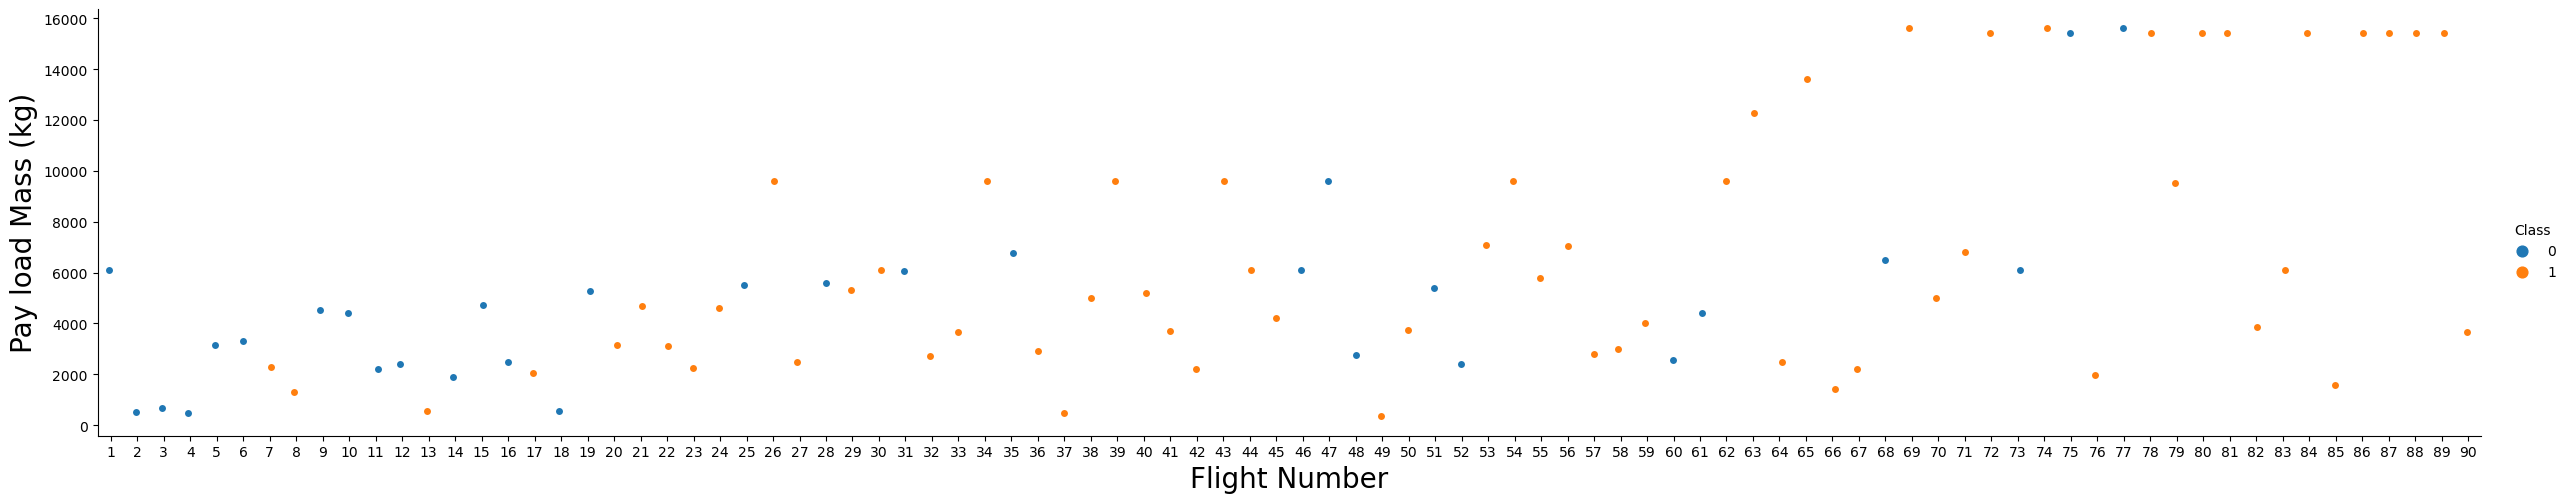

In [20]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

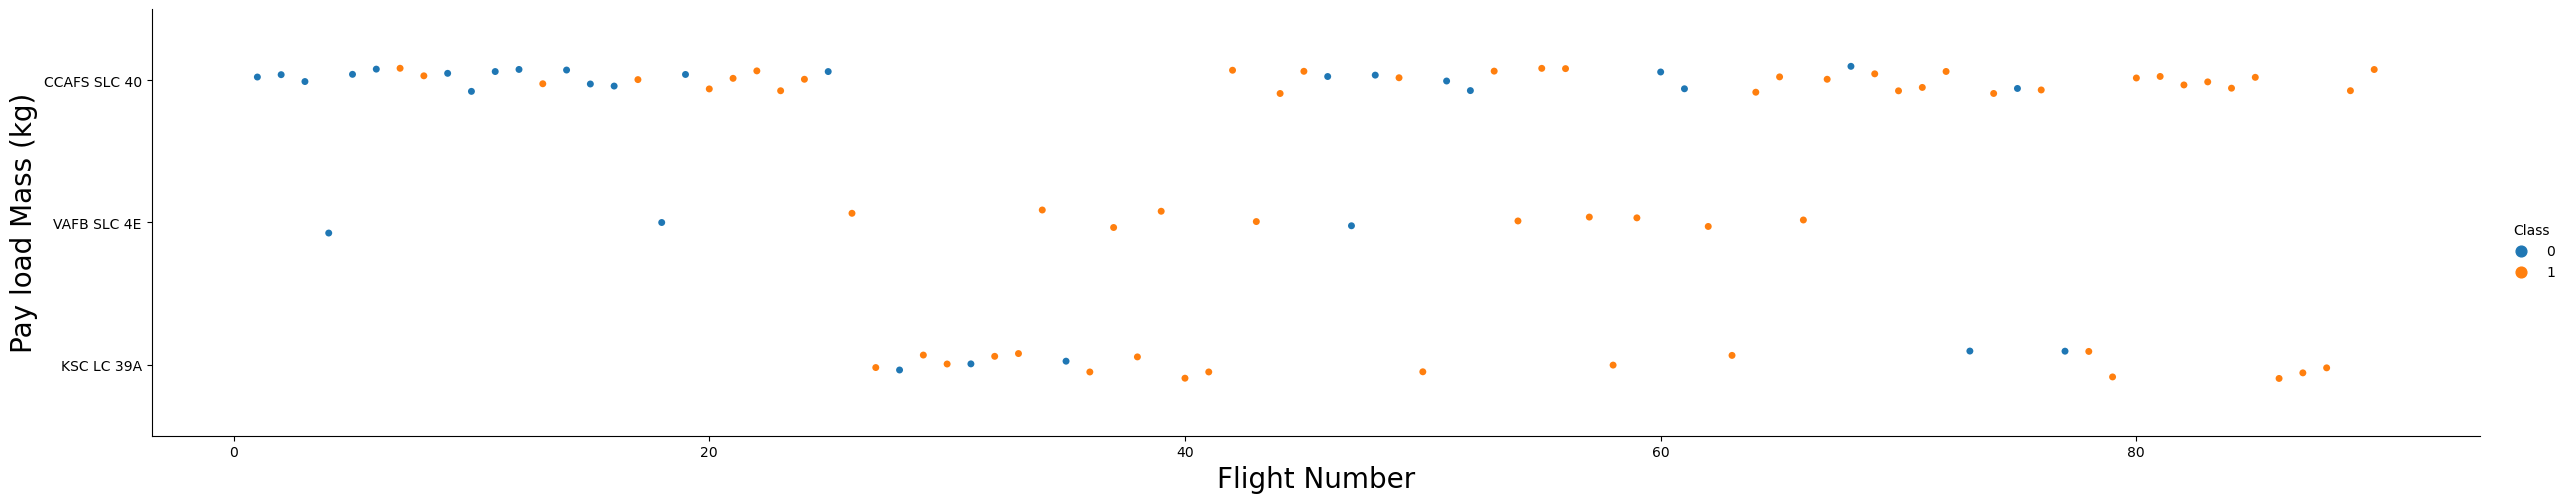

In [21]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

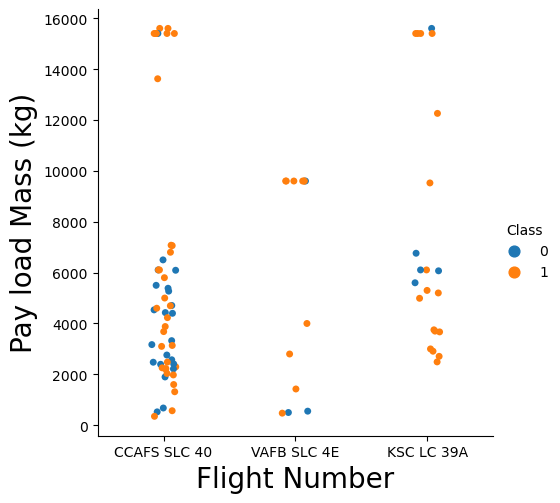

In [23]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

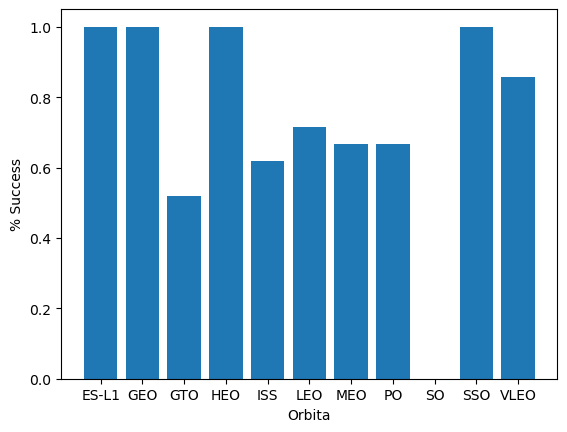

In [30]:
succes_orbit = df.groupby('Orbit')['Class'].mean()
plt.bar(succes_orbit.index, succes_orbit.values)
plt.xlabel('Orbita')
plt.ylabel('% Success')
plt.show()

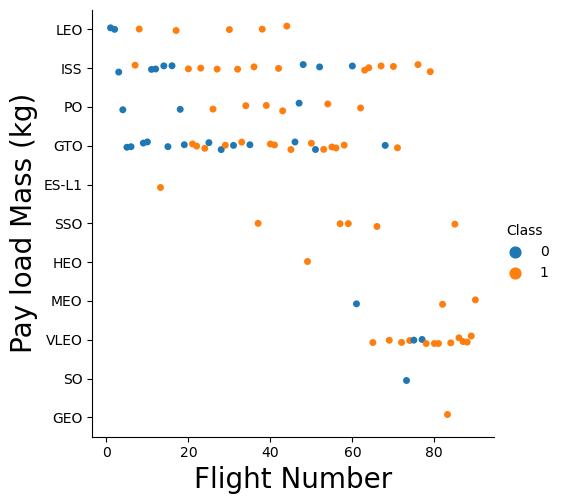

In [33]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

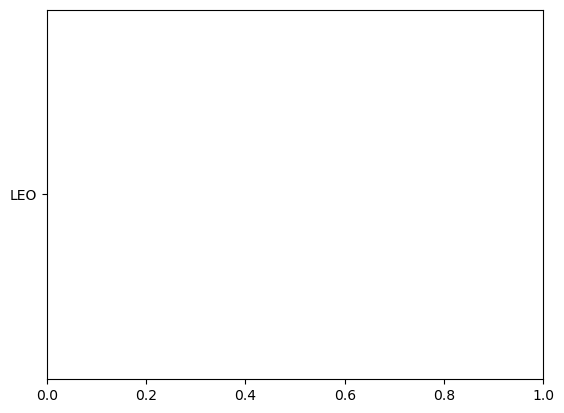

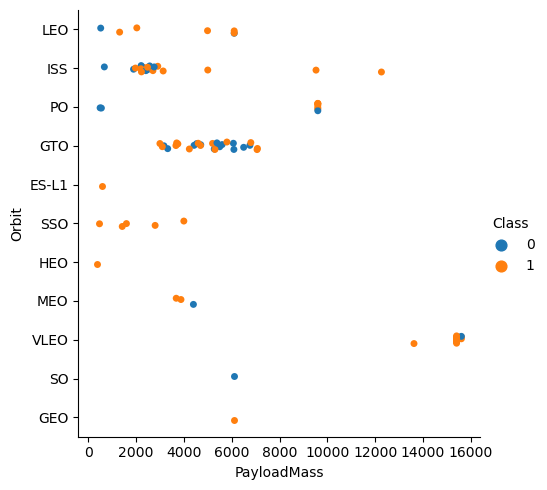

In [38]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel('PayloadMass')
plt.ylabel('Orbit')
plt.show()

In [39]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


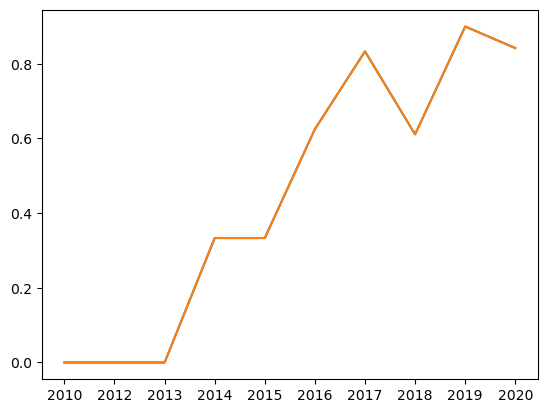

In [42]:
by_year = df.groupby('Date')['Class'].mean()
plt.plot(by_year.index, by_year.values)
plt.show()

In [43]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [45]:
codificador = OneHotEncoder()

In [46]:
LaunchSite_cod = codificador.fit_transform(features[['LaunchSite']])
data_codificado = pd.DataFrame(LaunchSite_cod.toarray(), columns=codificador.get_feature_names())
features = pd.concat([features, data_codificado], axis=1)

C:\Users\Der-Schopfer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
Orbits_cod = codificador.fit_transform(features[['Orbit']])
data_codificado = pd.DataFrame(Orbits_cod.toarray(), columns=codificador.get_feature_names_out())
features = pd.concat([features, data_codificado], axis=1)

In [52]:
Lanpad_cod = codificador.fit_transform(features[['LandingPad']])
data_codificado = pd.DataFrame(Lanpad_cod.toarray(), columns=codificador.get_feature_names_out())
features = pd.concat([features, data_codificado], axis=1)

In [53]:
Serial_cod = codificador.fit_transform(features[['Serial']])
data_codificado = pd.DataFrame(Serial_cod.toarray(), columns=codificador.get_feature_names_out())
features = pd.concat([features, data_codificado], axis=1)

In [57]:
features.to_csv('dataset_part_3.csv', index=False)

In [61]:
features.unique

AttributeError: 'DataFrame' object has no attribute 'unique'